## 4. Modeling

**Import Packages:**

In [1]:
#imports
import numpy as np

import pandas as pd
from sklearn import dummy, metrics
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import shap

**Set Random Seed:**

In [2]:
#random seed for repeatability
random_seed = 18

**Read Data Into Pandas:**

In [3]:
#read the data into pandas

filepath = '../data/X_train.csv'
X_train = pd.read_csv(filepath)

filepath = '../data/y_train.csv'
y_train = pd.read_csv(filepath)

filepath = '../data/X_test.csv'
X_test = pd.read_csv(filepath)

filepath = '../data/y_test.csv'
y_test = pd.read_csv(filepath)

## 4.1 Undersample the Training Data

In [4]:
#set undersample size to the number of rows in the minority class
undersample_size = y_train.value_counts().min()

#concatenate the X_train and y_train datasets
us_data = pd.concat([X_train,y_train],axis=1)

#minority/positive class
pos_us_data = us_data[us_data['WnvPresent']==1]

#sample the majority/negative class (n samples = undersample size)
neg_us_data = us_data[us_data['WnvPresent']==0].sample(undersample_size, random_state=random_seed)

#concatenate the two datasets to create the undersampled dataset
us_data = pd.concat([neg_us_data, pos_us_data], axis=0)

#Separate the Input Features (X) and Target Feature (y)
X_train_us = us_data.drop(columns='WnvPresent')
y_train_us = us_data[['WnvPresent']]

## 4.2 Train and Test Different Models

**DataFrame to Track Model AUC Scores:**

In [5]:
df_test_results = pd.DataFrame(columns = ['Model','TrainAUC','TestAUC'])

## 4.2.1 Baseline Model

In [6]:
dummy_model = DummyClassifier(random_state = random_seed, strategy='uniform')
dummy_model.fit(X_train_us,np.ravel(y_train_us))

y_train_pred = dummy_model.predict(X_train)
y_test_pred = dummy_model.predict(X_test)

In [7]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred, pos_label = 1)
train_auc = metrics.auc(fpr,tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label = 1)
test_auc = metrics.auc(fpr,tpr)

print('Training AUC: ', train_auc)
print('Test AUC: ', test_auc)

Training AUC:  0.5051133085072843
Test AUC:  0.5143723813291942


In [8]:
df_test_results = df_test_results.append({'Model':'Dummy','TrainAUC':train_auc,'TestAUC':test_auc}, 
                       ignore_index=True)

## 4.2.2 Logistic Regression

In [9]:
lr_model = LogisticRegression(random_state = random_seed)
lr_model.fit(X_train_us,np.ravel(y_train_us))

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred, pos_label = 1)
train_auc = metrics.auc(fpr,tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label = 1)
test_auc = metrics.auc(fpr,tpr)

print('Training AUC: ', train_auc)
print('Test AUC: ', test_auc)

Training AUC:  0.7981371540067697
Test AUC:  0.7637428858386343


In [11]:
df_test_results = df_test_results.append({'Model':'Logistic Regression','TrainAUC':train_auc,'TestAUC':test_auc}, 
                       ignore_index=True)

## 4.2.3 Support Vector Machine

In [12]:
svm_model = SVC(random_state = random_seed)
svm_model.fit(X_train_us,np.ravel(y_train_us))

y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred, pos_label = 1)
train_auc = metrics.auc(fpr,tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label = 1)
test_auc = metrics.auc(fpr,tpr)

print('Training AUC: ', train_auc)
print('Test AUC: ', test_auc)

Training AUC:  0.7894694770468106
Test AUC:  0.7469691897211147


In [14]:
df_test_results =  df_test_results.append({'Model':'SVM','TrainAUC':train_auc,'TestAUC':test_auc}, 
                       ignore_index=True)

## 4.2.4 Random Forest 

In [15]:
rf_model = RandomForestClassifier(random_state = random_seed)
rf_model.fit(X_train_us,np.ravel(y_train_us))

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred, pos_label = 1)
train_auc = metrics.auc(fpr,tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label = 1)
test_auc = metrics.auc(fpr,tpr)

print('Training AUC: ', train_auc)
print('Test AUC: ', test_auc)

Training AUC:  0.8689241120027602
Test AUC:  0.7463980278175123


In [17]:
df_test_results = df_test_results.append({'Model':'Random Forest','TrainAUC':train_auc,'TestAUC':test_auc}, 
                       ignore_index=True)

## 4.2.5 Gradient Boosting

In [18]:
gb_model = GradientBoostingClassifier(random_state = random_seed)
gb_model.fit(X_train_us,np.ravel(y_train_us))

y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred, pos_label = 1)
train_auc = metrics.auc(fpr,tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label = 1)
test_auc = metrics.auc(fpr,tpr)

print('Training AUC: ', train_auc)
print('Test AUC: ', test_auc)

Training AUC:  0.8316835511561365
Test AUC:  0.7763835205080603


In [20]:
df_test_results = df_test_results.append({'Model':'Gradient Boosting','TrainAUC':train_auc,'TestAUC':test_auc}, 
                       ignore_index=True)

## 4.2.6 XGBoost

In [21]:
xgb_model = XGBClassifier(use_label_encoder=False, seed=random_seed)
xgb_model.fit(X_train_us,np.ravel(y_train_us))

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

[09:52:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred, pos_label = 1)
train_auc = metrics.auc(fpr,tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label = 1)
test_auc = metrics.auc(fpr,tpr)

print('Training AUC: ', train_auc)
print('Test AUC: ', test_auc)

Training AUC:  0.8542783293575962
Test AUC:  0.7615840358726198


In [23]:
df_test_results = df_test_results.append({'Model':'XG Boost','TrainAUC':train_auc,'TestAUC':test_auc}, 
                       ignore_index=True)

## 4.2.7 LightGBM

In [24]:
lgb_model = LGBMClassifier(random_state = random_seed)
lgb_model.fit(X_train_us,np.ravel(y_train_us))

y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred, pos_label = 1)
train_auc = metrics.auc(fpr,tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label = 1)
test_auc = metrics.auc(fpr,tpr)

print('Training AUC: ', train_auc)
print('Test AUC: ', test_auc)

Training AUC:  0.8559287311945651
Test AUC:  0.7595408385833562


In [26]:
df_test_results = df_test_results.append({'Model':'LightGBM','TrainAUC':train_auc,'TestAUC':test_auc}, 
                       ignore_index=True)

## 4.2.8 AdaBoost

In [27]:
ada_model = AdaBoostClassifier(random_state = random_seed)
ada_model.fit(X_train_us,np.ravel(y_train_us))

y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_test)

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred, pos_label = 1)
train_auc = metrics.auc(fpr,tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label = 1)
test_auc = metrics.auc(fpr,tpr)

print('Training AUC: ', train_auc)
print('Test AUC: ', test_auc)

Training AUC:  0.8061430343301428
Test AUC:  0.7711598746081506


In [29]:
df_test_results = df_test_results.append({'Model':'AdaBoost','TrainAUC':train_auc,'TestAUC':test_auc}, 
                       ignore_index=True)

## 4.2.9 ExtraTrees Classifier

In [30]:
et_model = ExtraTreesClassifier(random_state = random_seed)
et_model.fit(X_train_us,np.ravel(y_train_us))

y_train_pred = et_model.predict(X_train)
y_test_pred = et_model.predict(X_test)

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred, pos_label = 1)
train_auc = metrics.auc(fpr,tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label = 1)
test_auc = metrics.auc(fpr,tpr)

print('Training AUC: ', train_auc)
print('Test AUC: ', test_auc)

Training AUC:  0.847922850871192
Test AUC:  0.7319333272463504


In [32]:
df_test_results = df_test_results.append({'Model':'Extra Trees','TrainAUC':train_auc,'TestAUC':test_auc}, 
                       ignore_index=True)

## 4.3 Hyperparameter Tuning

In [33]:
df_test_results.sort_values(by='TestAUC', ascending=False)

,Model,TrainAUC,TestAUC
4,Gradient Boosting,0.831684,0.776384
7,AdaBoost,0.806143,0.771160
1,Logistic Regression,0.798137,0.763743
5,XG Boost,0.854278,0.761584
6,LightGBM,0.855929,0.759541
2,SVM,0.789469,0.746969
3,Random Forest,0.868924,0.746398
8,Extra Trees,0.847923,0.731933
0,Dummy,0.505113,0.514372


In [34]:
grid_params = {
    'learning_rate':[0.001,0.01,0.1, 1],
    'max_depth':[3,6,7,8,9,10],
    'subsample':[0.25,0.5,0.75,1],
    'max_features':['sqrt','log2',1],
}

gb_model = GradientBoostingClassifier(random_state = random_seed)
gs_gb_model = RandomizedSearchCV(gb_model,grid_params, scoring='roc_auc',n_jobs=-1, cv=15, random_state=random_seed,
                                n_iter=30)
gs_gb_model.fit(X_train_us,np.ravel(y_train_us))

gb_model = gs_gb_model.best_estimator_

y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred, pos_label = 1)
train_auc = metrics.auc(fpr,tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label = 1)
test_auc = metrics.auc(fpr,tpr)

print('Training AUC: ', train_auc)
print('Test AUC: ', test_auc)

Training AUC:  0.8181375406744674
Test AUC:  0.7803836828276065


In [36]:
gs_gb_model.best_params_

{'subsample': 0.75,
 'max_features': 'log2',
 'max_depth': 3,
 'learning_rate': 0.1}

In [37]:
'''grid_params = {
    'learning_rate':[0.001,0.01,0.1, 1],
    'max_depth':[3,6,8,10]
}


gb_model = GradientBoostingClassifier(random_state = random_seed)
gs_gb_model = GridSearchCV(gb_model,grid_params, scoring='roc_auc',n_jobs=-1, cv=15)
gs_gb_model.fit(X_train_us,np.ravel(y_train_us))

gb_model = gs_gb_model.best_estimator_

y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)'''

"grid_params = {\n    'learning_rate':[0.001,0.01,0.1, 1],\n    'max_depth':[3,6,8,10]\n}\n\n\ngb_model = GradientBoostingClassifier(random_state = random_seed)\ngs_gb_model = GridSearchCV(gb_model,grid_params, scoring='roc_auc',n_jobs=-1, cv=15)\ngs_gb_model.fit(X_train_us,np.ravel(y_train_us))\n\ngb_model = gs_gb_model.best_estimator_\n\ny_train_pred = gb_model.predict(X_train)\ny_test_pred = gb_model.predict(X_test)"

In [38]:
'''fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred, pos_label = 1)
train_auc = metrics.auc(fpr,tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label = 1)
test_auc = metrics.auc(fpr,tpr)

print('Training AUC: ', train_auc)
print('Test AUC: ', test_auc)'''

"fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred, pos_label = 1)\ntrain_auc = metrics.auc(fpr,tpr)\n\nfpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label = 1)\ntest_auc = metrics.auc(fpr,tpr)\n\nprint('Training AUC: ', train_auc)\nprint('Test AUC: ', test_auc)"

In [39]:
'''gs_gb_model.best_params_'''

'gs_gb_model.best_params_'

In [40]:
'''grid_params = {
    'learning_rate':[0.01],
    'max_depth':[3],  
    'subsample':[0.25, 0.5, 0.75, 1],
    'max_features':['log2', 1]
}


gs_gb_model = GridSearchCV(gb_model,grid_params, scoring='roc_auc',n_jobs=-1, cv=15)
gs_gb_model.fit(X_train_us,np.ravel(y_train_us))

gb_model = gs_gb_model.best_estimator_

y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)'''

"grid_params = {\n    'learning_rate':[0.01],\n    'max_depth':[3],  \n    'subsample':[0.25, 0.5, 0.75, 1],\n    'max_features':['log2', 1]\n}\n\n\ngs_gb_model = GridSearchCV(gb_model,grid_params, scoring='roc_auc',n_jobs=-1, cv=15)\ngs_gb_model.fit(X_train_us,np.ravel(y_train_us))\n\ngb_model = gs_gb_model.best_estimator_\n\ny_train_pred = gb_model.predict(X_train)\ny_test_pred = gb_model.predict(X_test)"

In [41]:
'''gs_gb_model.best_params_'''

'gs_gb_model.best_params_'

In [42]:
'''fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred, pos_label = 1)
train_auc = metrics.auc(fpr,tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label = 1)
test_auc = metrics.auc(fpr,tpr)

print('Training AUC: ', train_auc)
print('Test AUC: ', test_auc)'''

"fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred, pos_label = 1)\ntrain_auc = metrics.auc(fpr,tpr)\n\nfpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label = 1)\ntest_auc = metrics.auc(fpr,tpr)\n\nprint('Training AUC: ', train_auc)\nprint('Test AUC: ', test_auc)"

## 4.4 SHAP Analysis

**SHAP Summary Plot:**

In [43]:
#get SHAP values
X_test_sample = shap.sample(X_test,300)
explainer = shap.KernelExplainer(gb_model.predict, X_test_sample)
shap_values = explainer.shap_values(X_test_sample)

Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/300 [00:00<?, ?it/s]

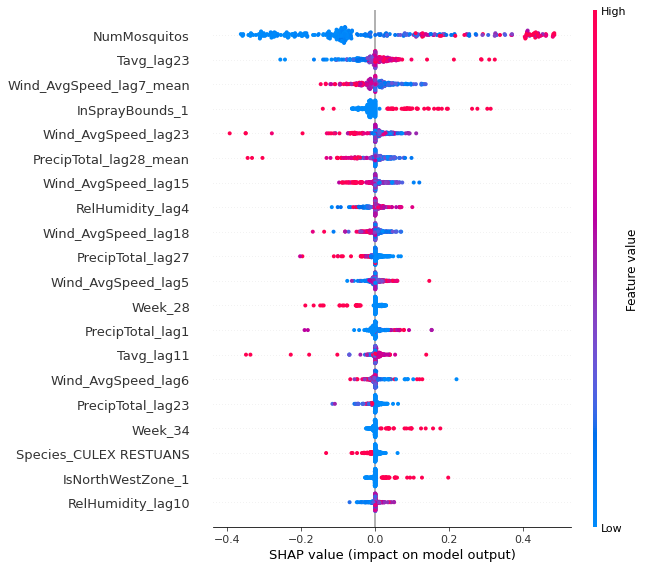

In [44]:
#create SHAP summary plot
shap.summary_plot(shap_values, X_test_sample)

**Feature Importance Conclusions:**

**Top 5 Features:**
* The **number of mosquitos** caught in a trap was the most important predictor of whether West Nile would be present. This makes sense because as the number of trapped mosquitos increases, there is a greater likelihood that at least one of the mosquitos will be West Nile positive.
* As the **average temperature lagged by 23 days** increased, it was more likely that West Nile would be present. Mosquitos tend to thrive in warmer environments so this was not surprising. The warmer temperatures likely led to improved breeding conditions. The length of the mosquito lifecycle tends to be 2-4 weeks (although it can be shorter depending on weather conditions). This explains why the 23-day lag is important.
* As the **mean wind speed 7-14 days prior** increased, the presence of West Nile decreased. Higher wind speeds likely make it more difficult for mosquitos to fly, reducing both their ability to fly greater distances and to accurately fly to a target destination. Again, 7-14 day lag it likely due to the length of the mosquito lifecycle which tends to be 2-4 weeks, but can be as short as one week in peak summer conditions. 
* Trap locations **within the spray boundaries** (the area bounded by all spray zones up to that date) also tended to have a much higher West Nile presence. This is likely due to correlation rather than causation. Spraying may have been a reactive response to areas that were already known to have high levels of West Nile (or high mosquito counts). The bounds created by all the spray zones, rather than only the spray zones themselves, were likely important because there is no reason to assume that mosquitos remain within a single trap zone. Mosquitos have a maximum flight distance of 50m to 50km, depending on the species. If there is a high number of mosquitos in one area, then it is likely that a high number will also be found in neighbouring areas. This should hold true for West Nile presence as well.
* As **average wind speed lagged by 23 days** increased, the presence of West Nile decreased. As mentioned above, higher wind speeds likely reduce both the distance mosquitos can fly and the ability of a mosquito to accurately fly to a target destination. This likely results in reduced breeding among mosquitos. Also mentioned above, the 23 day lag falls within the mosquito lifecycle.

References:
https://www.in.gov/health/erc/zoonotic-and-vectorborne-epidemiology-entomology/pests/culex-species-mosquitoes/
https://www.sciencedirect.com/science/article/pii/S0075951113001011